In [5]:
from bincatsim.simulator import GaiaSimulator
from bincatsim.instruments import CCD
from bincatsim.core.root import PSF_DATA_PATH
import numpy as np
import os

ccd = CCD(os.path.join(PSF_DATA_PATH, '1062x2124_gpsf.fits'))
sim = GaiaSimulator(ccd=ccd, M1=5, M2=5, distance=200, angle=45)

In [6]:
def calc_photons(**args):
    # M: magnitude
    # collecting_area: in m^2
    # integration_time: in seconds
    return sim._compute_star_flux(**args)

In [12]:
photon_curve = []
m_vec = np.linspace(0, 21, 400)
for M in m_vec:
    photon_curve.append(calc_photons(M=M, collecting_area=1.45*0.5, integration_time=4.42))

photon_curve = np.asarray(photon_curve)

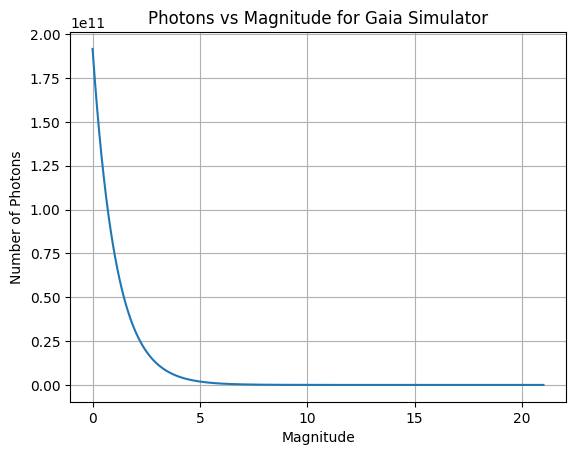

In [14]:
import matplotlib.pyplot as plt

plt.plot(m_vec, photon_curve)
plt.plot(photon_curve[np.where(photon_curve <= 2)], c='red')
plt.xlabel('Magnitude')
plt.ylabel('Number of Photons')
plt.title('Photons vs Magnitude for Gaia Simulator')
plt.grid(True)
plt.show()